In [1]:
from ROOT import TCanvas, TFile
from ROOT import TGraph, TF1
from ROOT import gStyle
from array import array
import math
import numpy as np
import random

c1 = TCanvas( 'c1', 'Non-Linear Fitting Example', 200, 10, 700, 500 )
c1.SetGridx()
c1.SetGridy()
c1.GetFrame().SetFillColor( 21 )
c1.GetFrame().SetBorderMode(-1 )
c1.GetFrame().SetBorderSize( 5 )

Welcome to JupyROOT 6.18/00


In [2]:
def fitfunction(x,par):
    return par[0]*x/(par[1]+x)

def fitfunction_root(x,par):
    return par[0]*x[0]/(par[1]+x[0])

In [3]:
def jacobian_beta1(x,par):
    return -x/(par[1]+x)

In [4]:
def jacobian_beta2(x,par):
    return par[0]*x/((par[1]+x)*(par[1]+x))

In [5]:
gStyle.SetOptFit(1)

par_actual = array('d')
par_actual.append(0.3797)
par_actual.append(0.5111)

beta_order = 2 #Set the order of the polynomial
n = 7 #Set the number of data points
x = array('d')
y = array('d')
ex = array('d')
ey = array('d')

x.append(0.038)
x.append(0.194)
x.append(0.425)
x.append(0.626)
x.append(1.253)
x.append(2.500)
x.append(3.740)

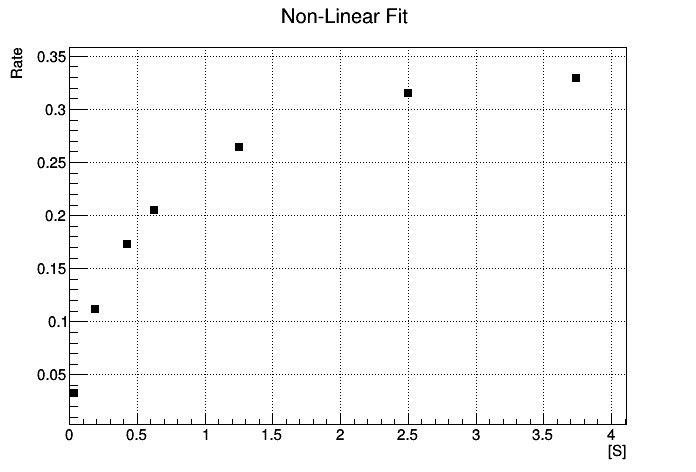

In [6]:
random.seed(1)

for i in range(0,n):
    r = random.gauss(0.0,0.005)
    y.append(fitfunction(x[i],par_actual)+r)
    
gr = TGraph(n,x,y)
gr.SetMarkerStyle(21)
gr.SetTitle("Non-Linear Fit")
gr.GetXaxis().SetTitle("[S]")
gr.GetYaxis().SetTitle("Rate")
gr.Draw("AP")
c1.Draw()

In [7]:
m = beta_order

Jacobian = np.zeros(shape = (n,m))
JacobianT = np.zeros(shape = (m,n))
JTdy = np.zeros(shape = (m,1))
JTJ = np.zeros(shape = (m,m))
JTJInv = np.zeros(shape = (m,m))
residuals = np.zeros(shape = (n,1))
betas = np.zeros(shape = (m,1))
Delta = np.zeros(shape = (m,1))

In [8]:
betas[0][0] = 0.30
betas[1][0] = 0.75

parameter_matrix = array('d')
parameter_matrix_dbeta = array('d')
parameter_matrix.append(betas[0][0])
parameter_matrix.append(betas[1][0])

dbetamax = 10000
dbeta = 0
epsilon = 0.0000001
epsilon_beta = 0.01

In [9]:
while (dbetamax > epsilon):
    for i in range(0,n):
        function_value = fitfunction(x[i],parameter_matrix)
        residuals[i][0]=y[i]-function_value
        for j in range(0,m):
            if (j==0):
                jacobian = jacobian_beta1(x[i],parameter_matrix)
            else:
                jacobian = jacobian_beta2(x[i],parameter_matrix)
            Jacobian[i][j]=jacobian
            #print(i,j,Jacobian[i][j])
            
    JacobianT = Jacobian.transpose()
    JTdy = np.array(np.matrix(JacobianT)*np.matrix(residuals))
    JTJ = np.array(np.matrix(JacobianT)*np.matrix(Jacobian))
    JTJInv = np.array(np.linalg.inv(JTJ))
    Delta = np.array(np.matrix(JTJInv)*np.matrix(JTdy))

    dbetamax = 0.0
    
    for j in range(0,m):
        parameter_matrix[j]=parameter_matrix[j]-Delta[j][0]
        dbeta = math.fabs(Delta[j][0]/parameter_matrix[j])
        if (dbeta > dbetamax): 
            dbetamax = dbeta
        print ("dbetamax = %f" % dbetamax )

dbetamax = 0.176813
dbetamax = 1.442770
dbetamax = 0.001228
dbetamax = 0.292150
dbetamax = 0.015509
dbetamax = 0.094310
dbetamax = 0.001759
dbetamax = 0.008773
dbetamax = 0.000081
dbetamax = 0.000333
dbetamax = 0.000003
dbetamax = 0.000011
dbetamax = 0.000000
dbetamax = 0.000000
dbetamax = 0.000000
dbetamax = 0.000000


In [10]:
print(Jacobian)
print(Jacobian[6][1])
print(" ")

print(JacobianT)
print(JacobianT[1][6])
print(" ")

print(JTdy)
print(JTdy[0][0])
print(" ")

print(JTJ)
print(JTJ[0][0])
print(" ")

print(JTJInv)
print(JTJInv[0][0])
print(" ")


[[-0.07289204  0.05191848]
 [-0.28642341  0.15702207]
 [-0.46789733  0.19127473]
 [-0.56431021  0.18888909]
 [-0.72164162  0.15432542]
 [-0.83799287  0.10430041]
 [-0.88555945  0.07785907]]
0.07785907388859169
 
[[-0.07289204 -0.28642341 -0.46789733 -0.56431021 -0.72164162 -0.83799287
  -0.88555945]
 [ 0.05191848  0.15702207  0.19127473  0.18888909  0.15432542  0.10430041
   0.07785907]]
0.07785907388859169
 
[[ 3.52463284e-15]
 [-2.41012727e-10]]
3.5246328425331264e-15
 
[[ 2.63193976 -0.5125677 ]
 [-0.5125677   0.14037351]]
2.6319397591060105
 
[[ 1.3152333   4.80251648]
 [ 4.80251648 24.66002848]]
1.315233303537492
 


In [11]:
error_sum = 0
yfit = 0
error = array('d')

for i in range(0,n):
    yfit = fitfunction(x[i],parameter_matrix)
    print ("i x y fit = %d %f %f %f " % (j,x[i],y[i],yfit))
    error_sum = error_sum + (yfit-y[i])*(yfit-y[i])
    yfit = 0
    
chi2 = error_sum/(n-m)
print ("chi2/dof = %f / %f" % (error_sum,(n-m)))

for k in range(0,m):
        error.append(math.sqrt(chi2*JTJInv[k][k]))
        print(" beta[%d] = %f +/- %f" % ((k+1),parameter_matrix[k],error[k]))


i x y fit = 1 0.038000 0.032718 0.027066 
i x y fit = 1 0.194000 0.111717 0.106354 
i x y fit = 1 0.425000 0.172720 0.173738 
i x y fit = 1 0.626000 0.205211 0.209538 
i x y fit = 1 1.253000 0.264231 0.267958 
i x y fit = 1 2.500000 0.315407 0.311161 
i x y fit = 1 3.740000 0.328939 0.328824 
chi2/dof = 0.000112 / 5.000000
 beta[1] = 0.371317 +/- 0.005437
 beta[2] = 0.483319 +/- 0.023544


In [12]:
pfit1 = TF1("fitfunction",fitfunction_root,0.0,4.0,2)
pfit1.SetParameters(0.30,0.75)
pfit1.SetParNames("Vmax","Km")

gr.Fit("fitfunction","V")
pfit1chi2 = pfit1.GetChisquare()
pfit1ndf = pfit1.GetNDF()
pfit1chi2ndf = pfit1chi2/pfit1ndf
print("Fit 1: %f %f \n" % (pfit1chi2,pfit1ndf))

gr.Draw("AP")

Fit 1: 0.000112 5.000000 

 **********
 **    1 **SET PRINT           2
 **********
 **********
 **    2 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 Vmax         3.00000e-01  9.00000e-02     no limits
     2 Km           7.50000e-01  2.25000e-01     no limits
 **********
 **    3 **SET ERR           1
 **********
 **********
 **    4 **SET PRINT           2
 **********
 **********
 **    5 **SET STR           1
 **********
 NOW USING STRATEGY  1: TRY TO BALANCE SPEED AGAINST RELIABILITY
 **********
 **    6 **MIGRAD        1220        0.01
 **********
 FIRST CALL TO USER FUNCTION AT NEW START POINT, WITH IFLAG=4.
 START MIGRAD MINIMIZATION.  STRATEGY  1.  CONVERGENCE WHEN EDM .LT. 1.00e-05
 FCN=0.00676142 FROM MIGRAD    STATUS=INITIATE       21 CALLS          22 TOTAL
                     EDM= unknown      STRATEGY= 1      NO ERROR MATRIX       
  EXT PARAMETER               CURRENT GUESS       STEP         FIRST   
  

Info in <TMinuitMinimizer::Minimize>: Finished to run MIGRAD - status 0


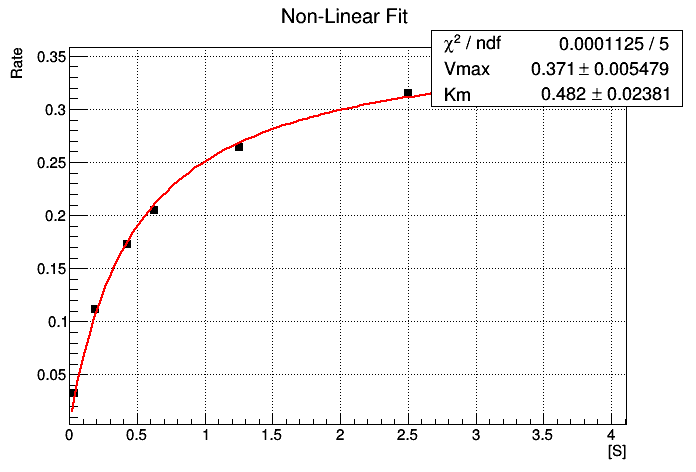

In [13]:
c1.Draw()

In [14]:
c2 = TCanvas( 'c2', 'S^2 Histogram', 200, 10, 700, 500 )
c2.SetGridx()
c2.SetGridy()
c2.GetFrame().SetFillColor( 21 )
c2.GetFrame().SetBorderMode(-1 )
c2.GetFrame().SetBorderSize( 5 )

In [15]:
nbins = 101
xwidth = 0.2000
ywidth = 0.5000
xlow = parameter_matrix[0]-xwidth/2.0
xhigh = parameter_matrix[0]+xwidth/2.0
ylow = parameter_matrix[1]-ywidth/2.0
yhigh = parameter_matrix[1]+ywidth/2.0

In [16]:
from ROOT import TH2D
h2 = TH2D("h2","S^2 Histogram",nbins,xlow,xhigh,nbins,ylow,yhigh)

In [19]:
b1 = array('d')
b2 = array('d')
pars = array('d')
pars.append(0)
pars.append(0)
for j in range(0,nbins):
    b1.append(0)
    b2.append(0)
    
for j in range(0,nbins):
    pars[0]=(parameter_matrix[0]+(j-(nbins-1.0)/2.0)/(nbins-1)*xwidth)
    b1[j]=pars[0]
    for k in range(0,nbins):
        pars[1]=(parameter_matrix[1]+(k-(nbins-1.0)/2.0)/(nbins-1)*ywidth)
        b2[k]=pars[1]
        sum = 0
        for i in range(0,n):
            yfit = fitfunction(x[i],pars)
            sum = sum + (yfit-y[i])*(yfit-y[i])
        h2.Fill(b1[j],b2[k],sum)

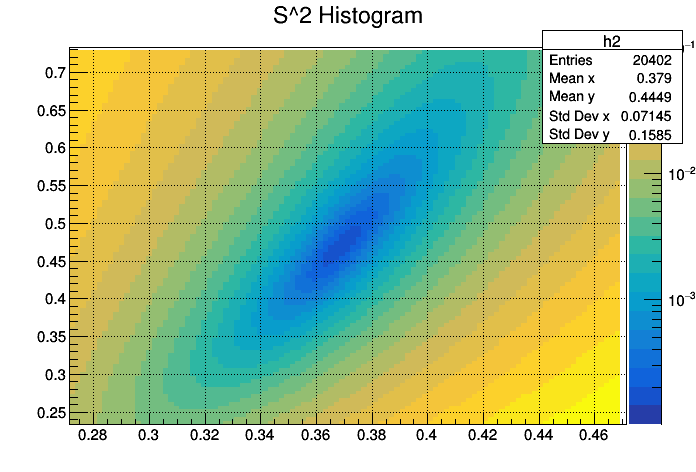

In [20]:
c2.SetLogz()
h2.Draw("COLZ")
c2.Draw()
